Shape of the dataset before outlier removal: (10000, 15)
Shape of the dataset after outlier removal: (10000, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             10000 non-null  int64  
 1   region                  10000 non-null  object 
 2   energy_consumption_kwh  10000 non-null  float64
 3   peak_hours_usage        10000 non-null  float64
 4   off_peak_usage          10000 non-null  float64
 5   renewable_energy_pct    10000 non-null  float64
 6   billing_amount          10000 non-null  float64
 7   household_size          10000 non-null  int64  
 8   temperature_avg         10000 non-null  float64
 9   income_bracket          10000 non-null  object 
 10  smart_meter_installed   10000 non-null  bool   
 11  time_of_day_pricing     10000 non-null  bool   
 12  annual_energy_trend     10000 no

<Figure size 1000x600 with 0 Axes>

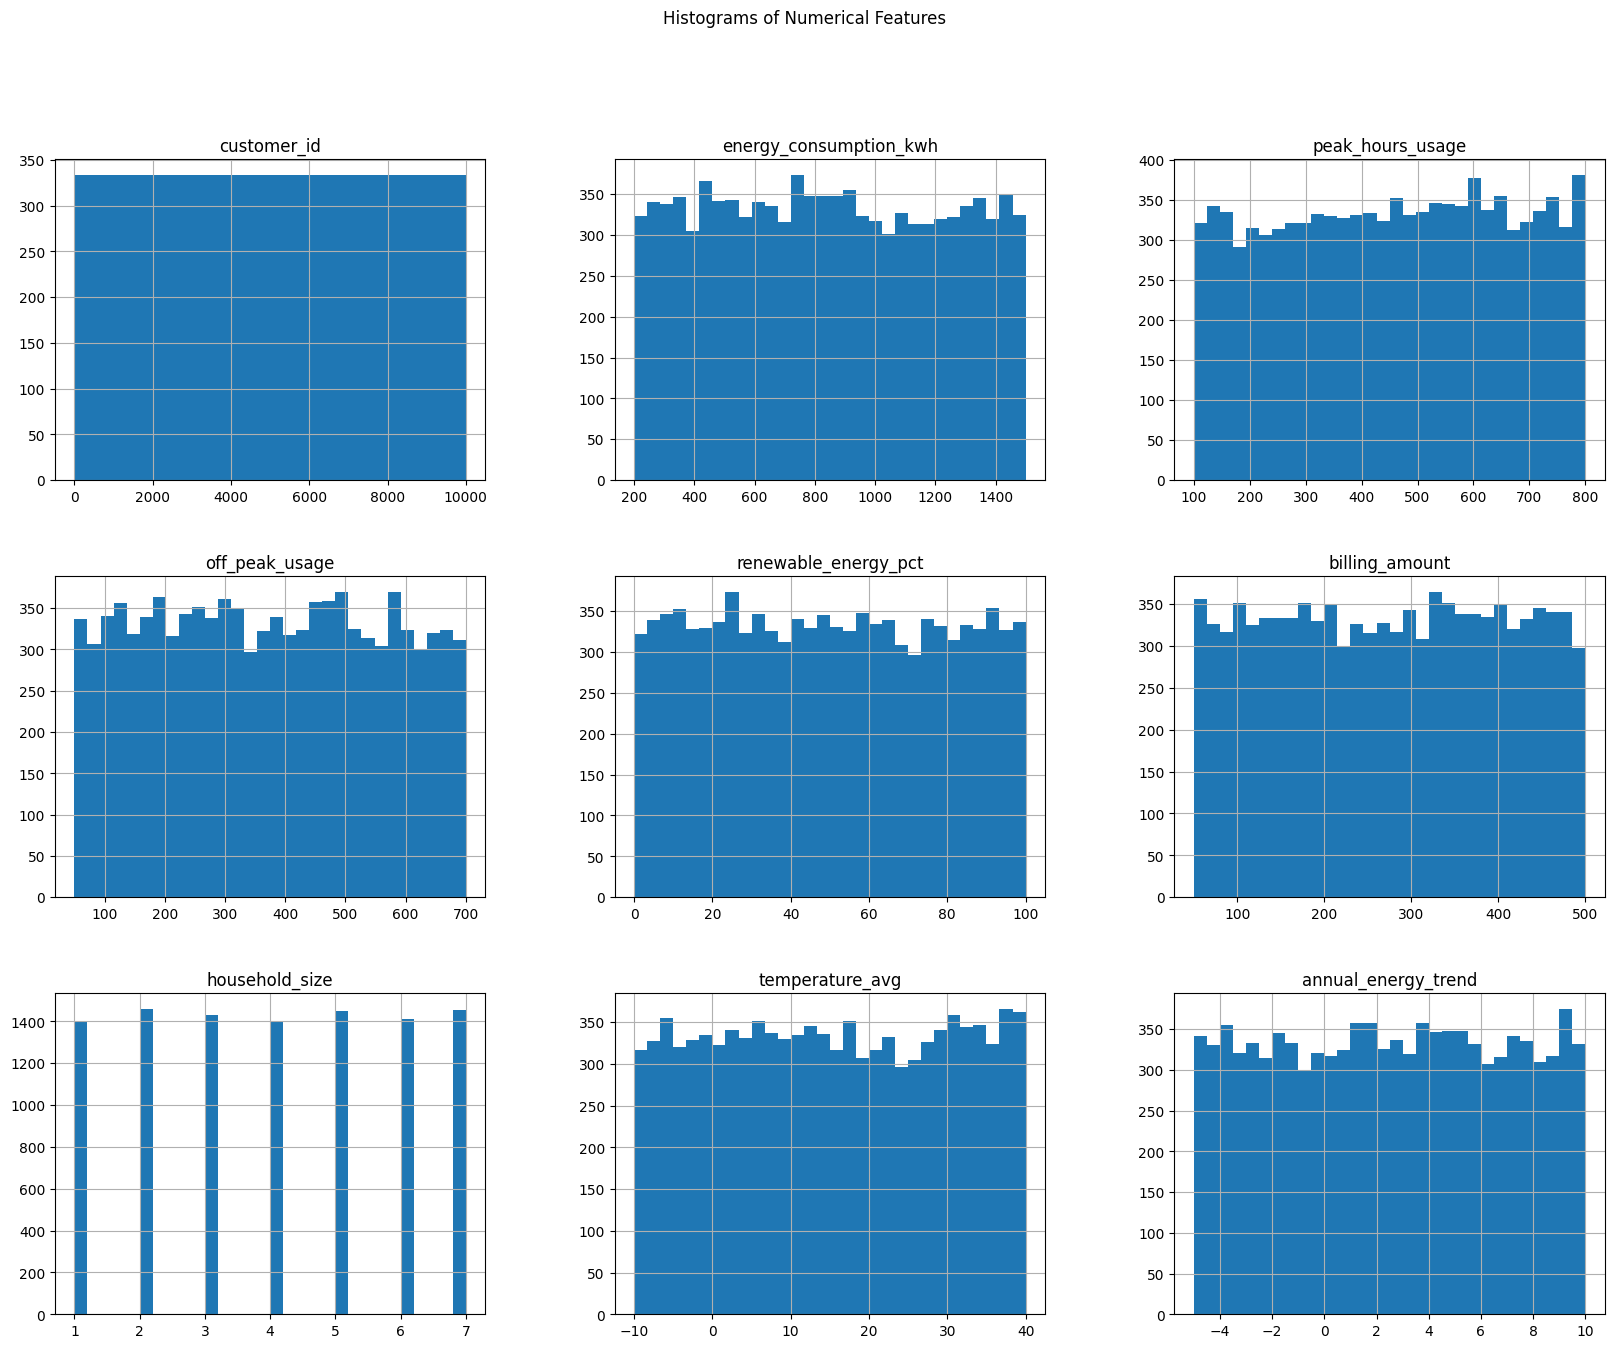

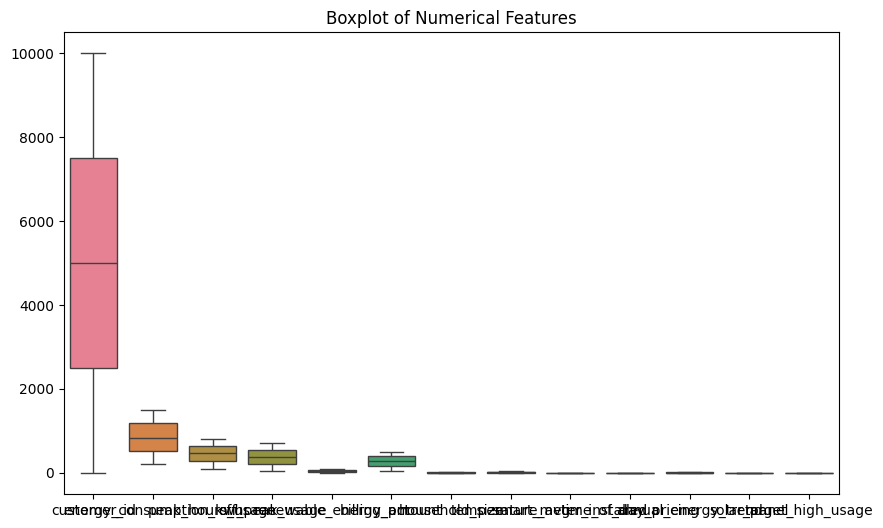

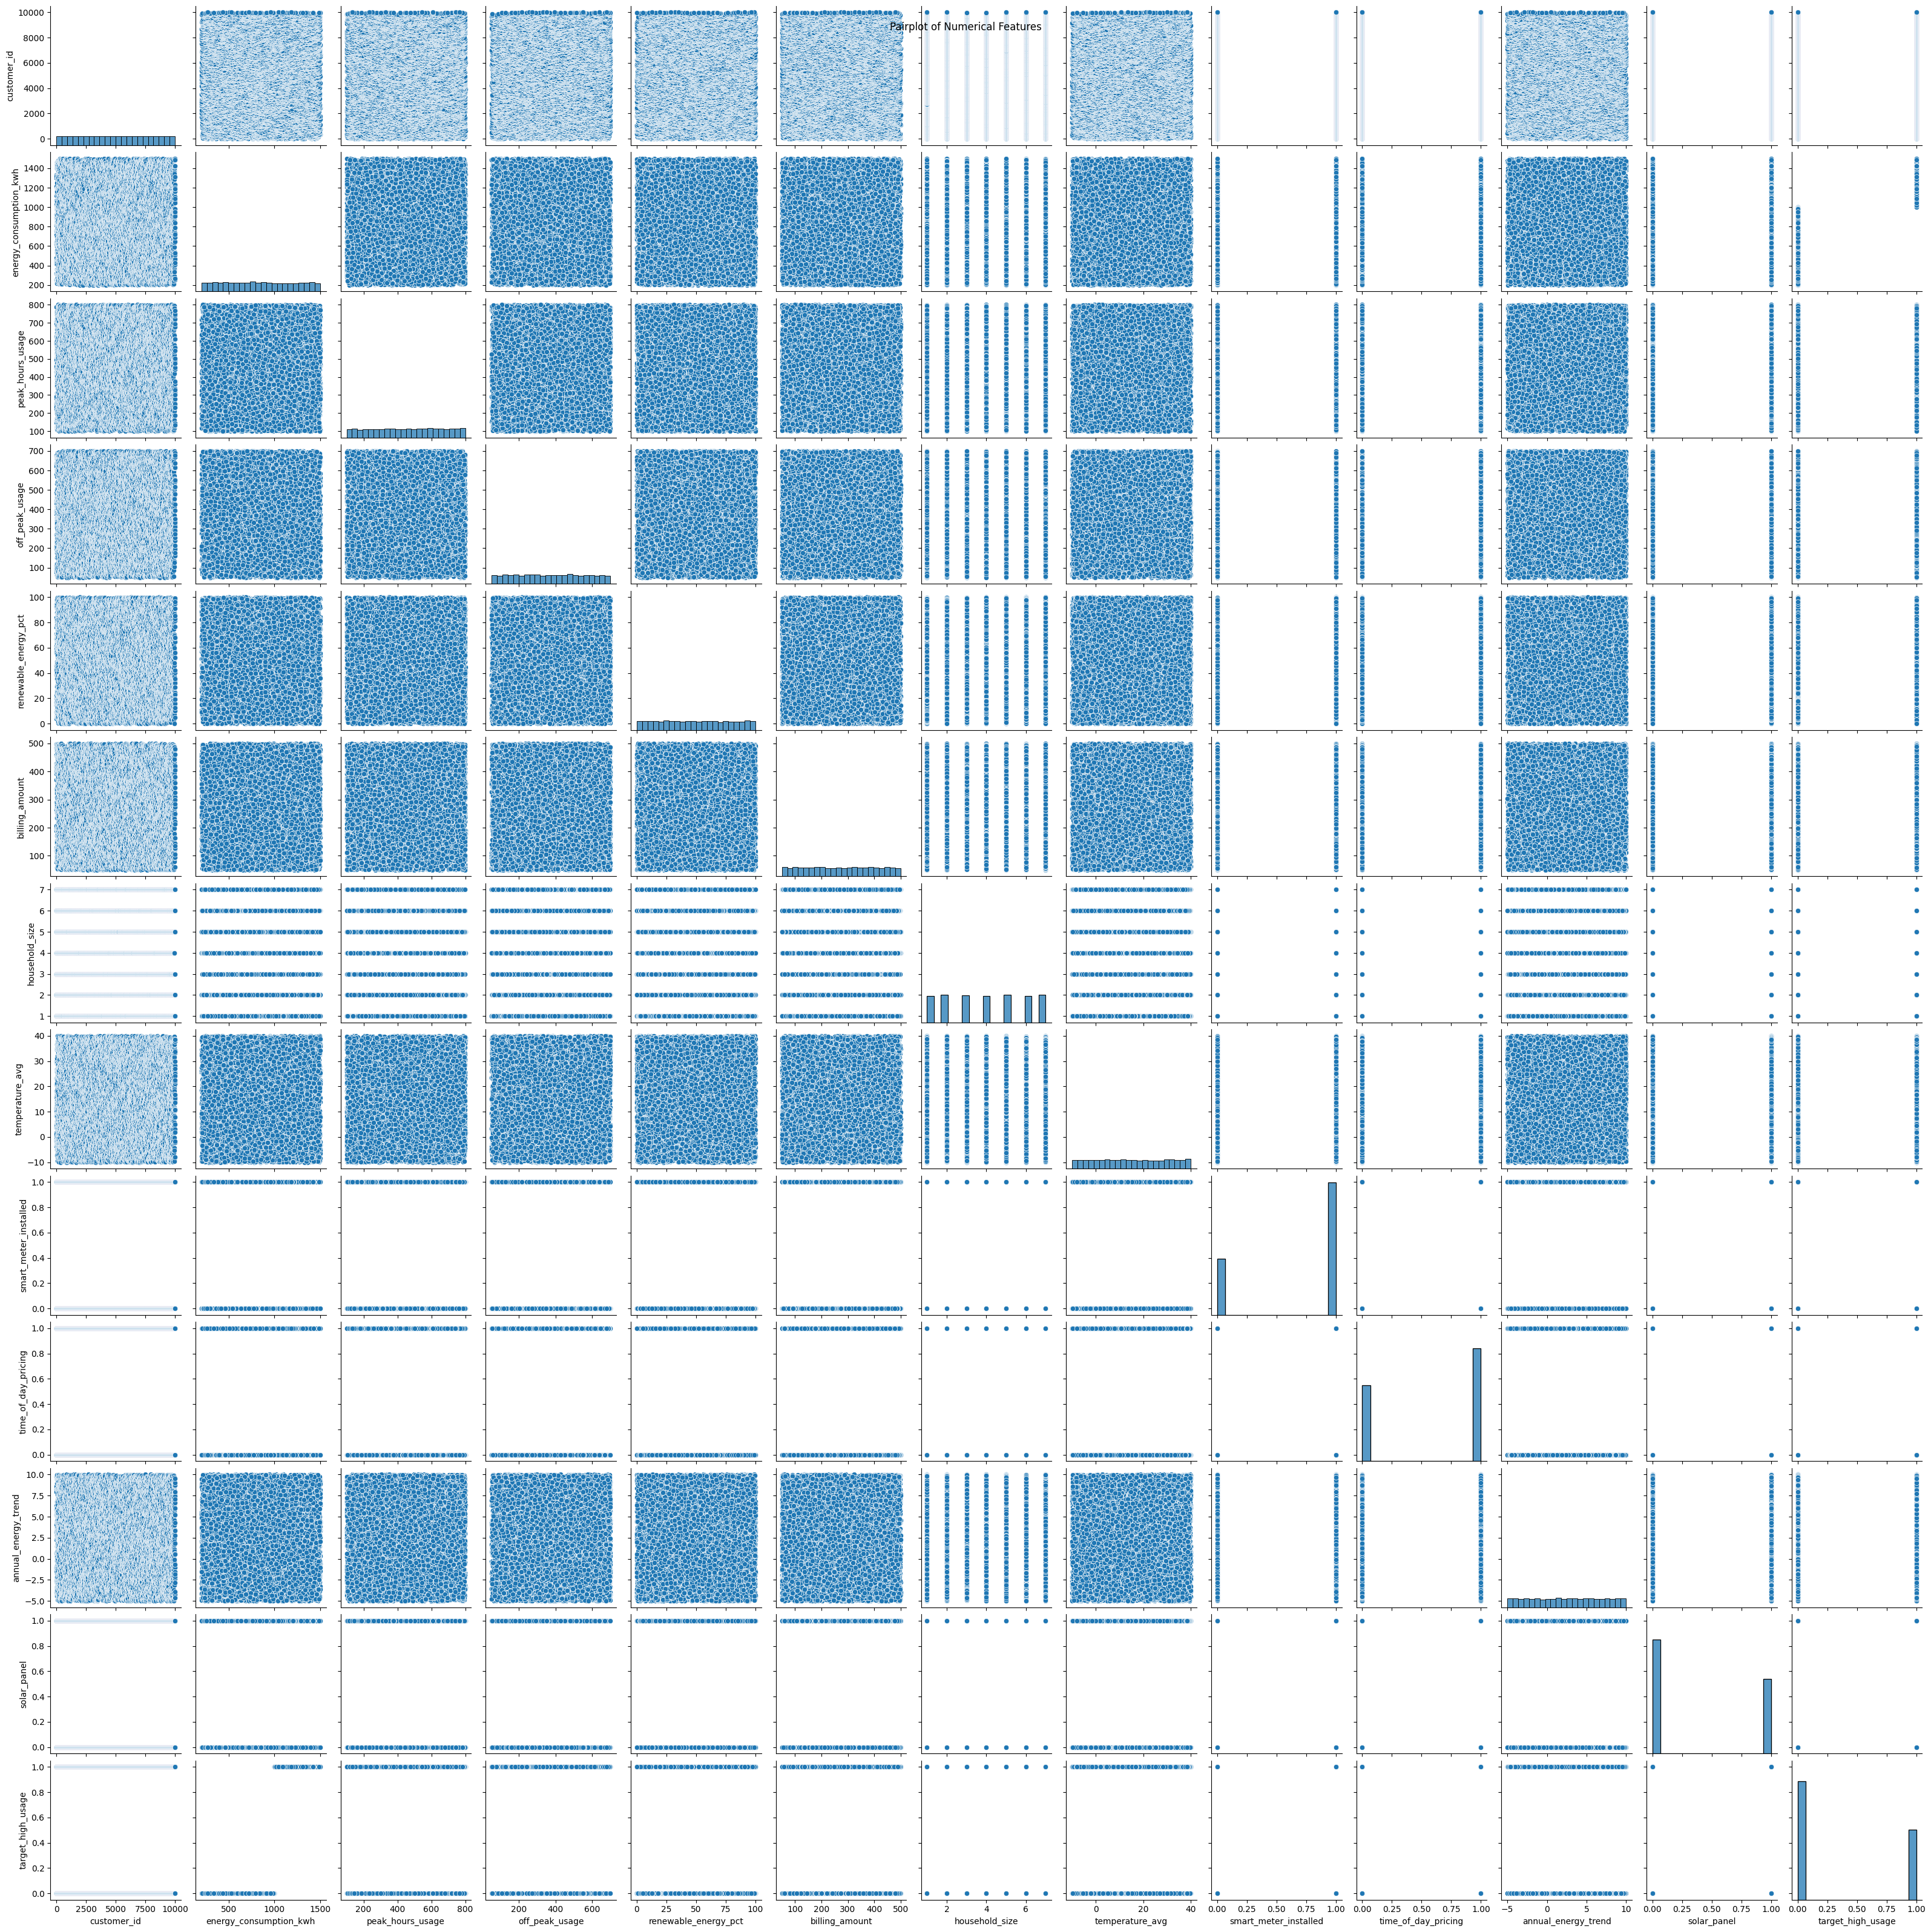

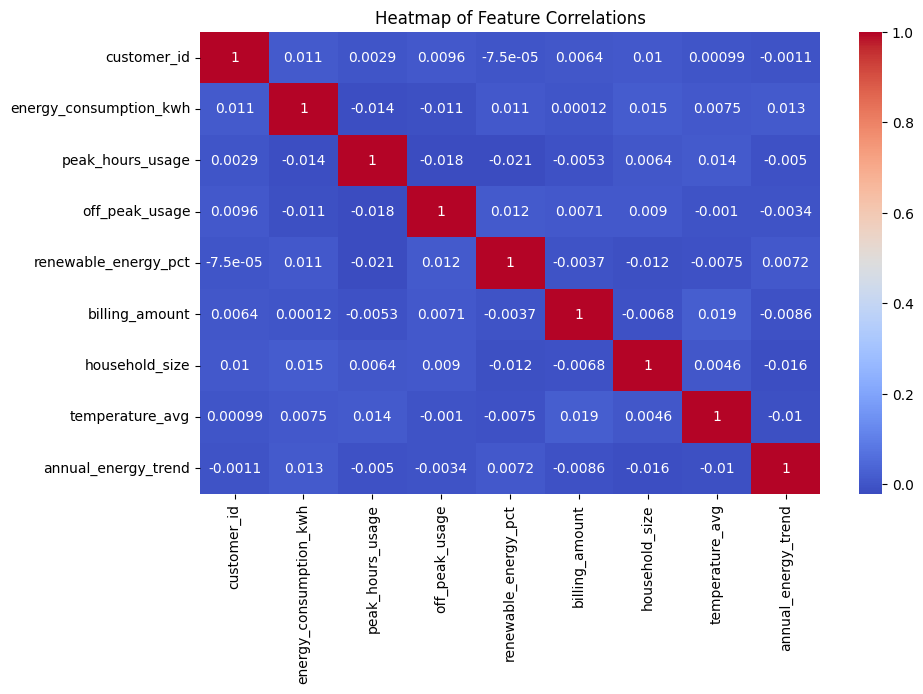

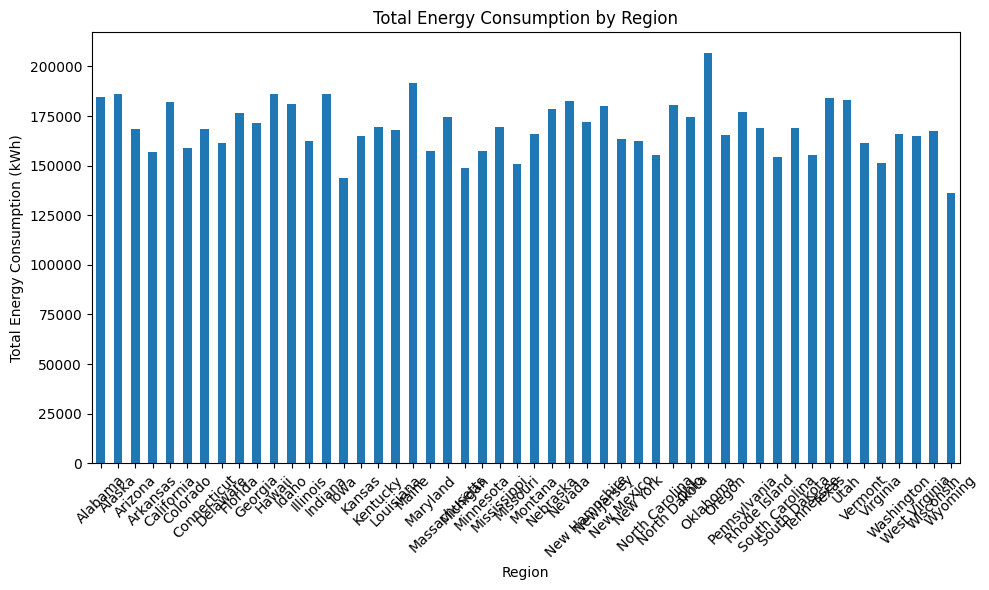

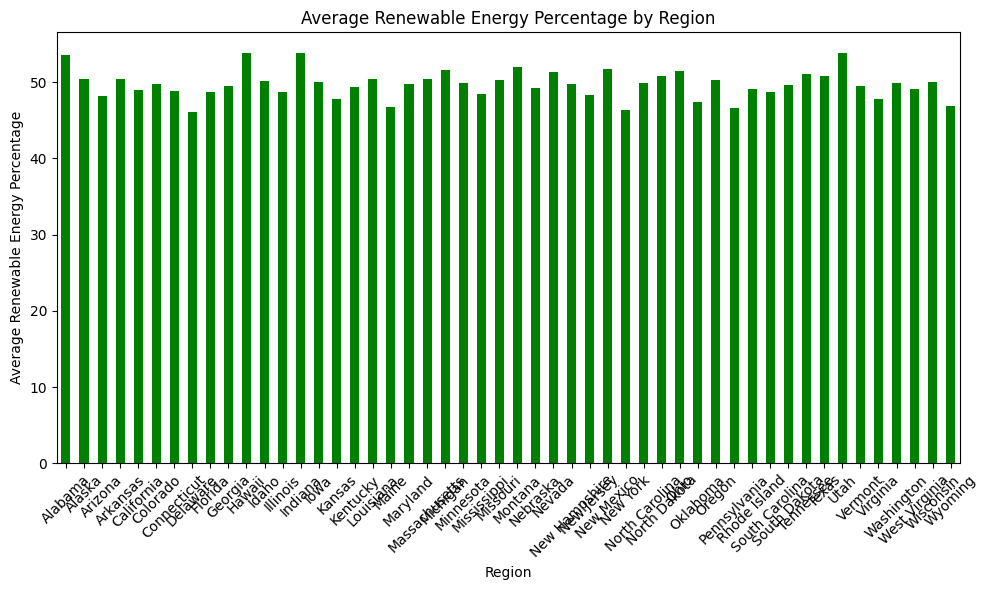

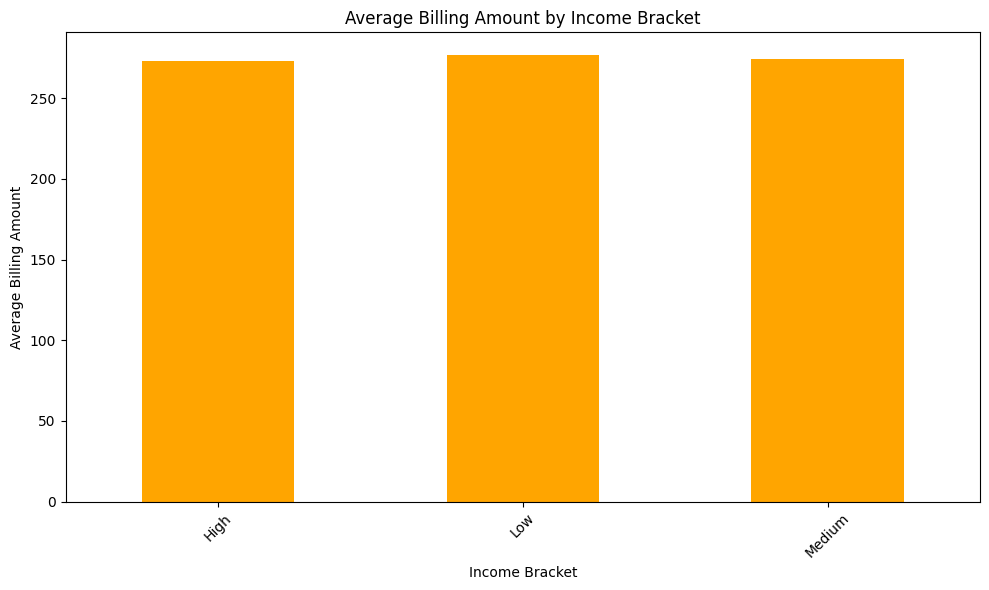

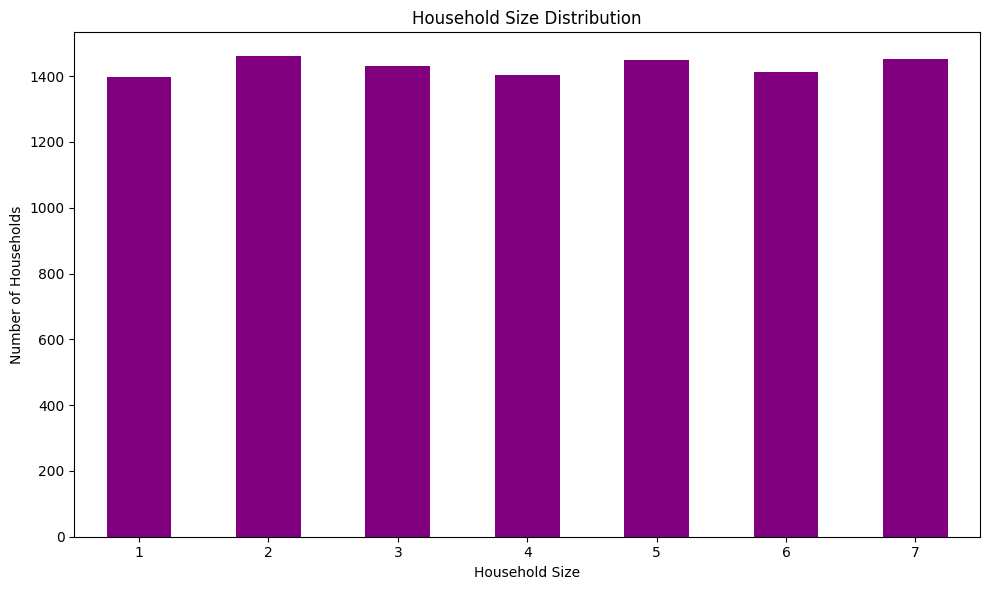

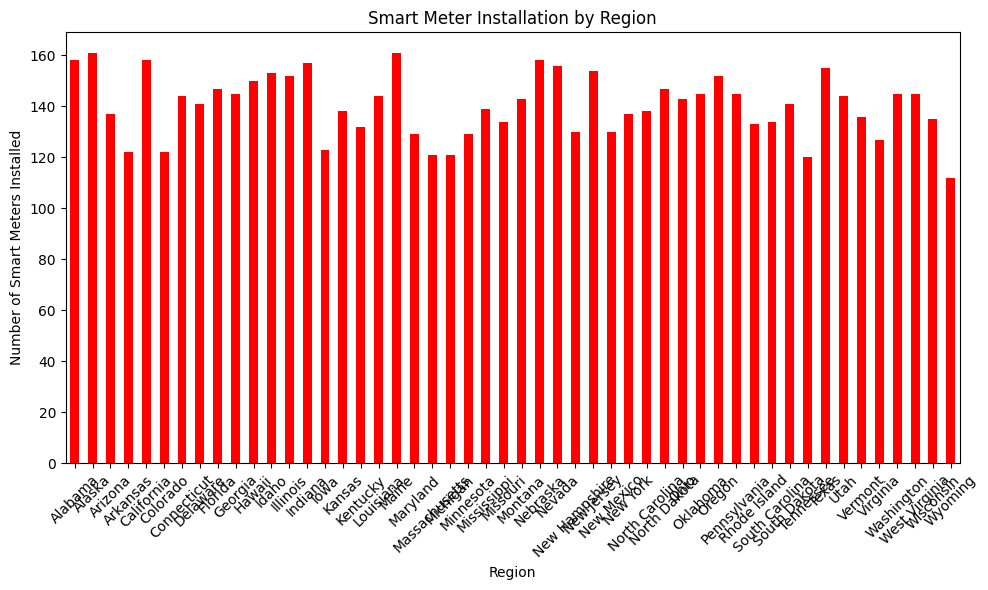

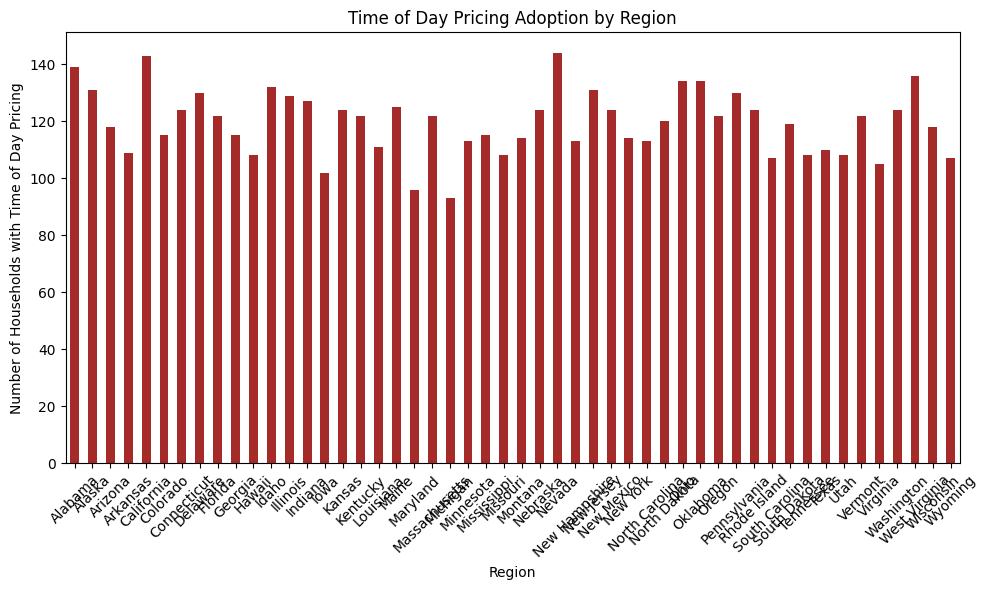

Shape of training data: (7000, 6)
Shape of validation data (used for tuning): (1500, 6)
Shape of unseen data: (1500, 6)

Initial Model Evaluation Results (on Validation Set):
{'Linear Regression': {'Mean Squared Error': 17831.489568299094, 'R-squared': -0.0010310655696854631}, 'Random Forest': {'Mean Squared Error': 18785.13979211342, 'R-squared': -0.05456745107854233}, 'Decision Tree': {'Mean Squared Error': 34549.9655374, 'R-squared': -0.939579342759219}}

Linear Regression Coefficients:
                        Coefficient
energy_consumption_kwh     0.793297
peak_hours_usage          -0.314245
off_peak_usage            -0.192417
renewable_energy_pct       0.705094
household_size            -0.653738
temperature_avg            3.038785

The best initial model (on Validation Set) is: Linear Regression with R-squared value of -0.0010
The worst initial model (on Validation Set) is: Decision Tree with R-squared value of -0.9396

--- Hyperparameter Tuning and Pipeline for Random Forest ---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import joblib  # For saving the pipeline

# Load the dataset
file_path = 'C:/Users/sayan/Downloads/Energy_dataset.csv'
df = pd.read_csv(file_path)

# Display the shape of the dataset before outlier removal
print("Shape of the dataset before outlier removal:", df.shape)

# Remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# List of columns to remove outliers from
columns_to_check = ['energy_consumption_kwh', 'peak_hours_usage', 'off_peak_usage', 'renewable_energy_pct', 'billing_amount', 'household_size', 'temperature_avg']

# Remove outliers for each column
for column in columns_to_check:
    df = remove_outliers(df, column)

# Display the shape of the dataset after outlier removal
print("Shape of the dataset after outlier removal:", df.shape)

# Use .info() method to display feature data types
print(df.info())

# Visualize the data
plt.figure(figsize=(10, 6))

# Histogram of all numerical features
df.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Numerical Features')
plt.show()

# Pairplot to visualize relationships between features
sns.pairplot(df)
plt.suptitle('Pairplot of Numerical Features')
plt.show()

# Heatmap to visualize correlation between features (excluding non-numerical columns)
plt.figure(figsize=(10, 6))
numerical_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()

# Additional Visualizations
# Plot 1: Total Energy Consumption by Region
plt.figure(figsize=(10, 6))
df.groupby('region')['energy_consumption_kwh'].sum().plot(kind='bar')
plt.title('Total Energy Consumption by Region')
plt.xlabel('Region')
plt.ylabel('Total Energy Consumption (kWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Average Renewable Energy Percentage by Region
plt.figure(figsize=(10, 6))
df.groupby('region')['renewable_energy_pct'].mean().plot(kind='bar', color='green')
plt.title('Average Renewable Energy Percentage by Region')
plt.xlabel('Region')
plt.ylabel('Average Renewable Energy Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 3: Average Billing Amount by Income Bracket
plt.figure(figsize=(10, 6))
df.groupby('income_bracket')['billing_amount'].mean().plot(kind='bar', color='orange')
plt.title('Average Billing Amount by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Average Billing Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 4: Household Size Distribution
plt.figure(figsize=(10, 6))
df['household_size'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title('Household Size Distribution')
plt.xlabel('Household Size')
plt.ylabel('Number of Households')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot 5: Smart Meter Installation by Region
plt.figure(figsize=(10, 6))
df.groupby('region')['smart_meter_installed'].sum().plot(kind='bar', color='red')
plt.title('Smart Meter Installation by Region')
plt.xlabel('Region')
plt.ylabel('Number of Smart Meters Installed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 6: Time of Day Pricing Adoption by Region
plt.figure(figsize=(10, 6))
df.groupby('region')['time_of_day_pricing'].sum().plot(kind='bar', color='brown')
plt.title('Time of Day Pricing Adoption by Region')
plt.xlabel('Region')
plt.ylabel('Number of Households with Time of Day Pricing')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Define the features (X) and target (y) for the model
X = df[['energy_consumption_kwh', 'peak_hours_usage', 'off_peak_usage', 'renewable_energy_pct', 'household_size', 'temperature_avg']]
y = df['billing_amount']

# Split the data into training and a larger 'test' set for unseen data check
X_train, X_test_all, y_train, y_test_all = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split the 'test' set into a validation set (for tuning) and a truly unseen 'new' test set
X_val, X_unseen, y_val, y_unseen = train_test_split(X_test_all, y_test_all, test_size=0.5, random_state=42)

print(f"Shape of training data: {X_train.shape}")
print(f"Shape of validation data (used for tuning): {X_val.shape}")
print(f"Shape of unseen data: {X_unseen.shape}")

# Standardize the training features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_unseen_scaled = scaler.transform(X_unseen)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

# Train and evaluate each model on the validation set (as a proxy for initial evaluation)
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions on the validation set
    y_pred = model.predict(X_val_scaled)

    # Evaluate the model
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    # Store the results
    results[model_name] = {
        "Mean Squared Error": mse,
        "R-squared": r2
    }

# Display the initial model evaluation results on the validation set
print("\nInitial Model Evaluation Results (on Validation Set):")
print(results)

# Display the coefficients of the Linear Regression model
if "Linear Regression" in models:
    lr_model = models["Linear Regression"]
    coefficients = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])
    print("\nLinear Regression Coefficients:")
    print(coefficients)

# Determine the best and worst model based on R-squared value on the validation set
best_model_name = max(results, key=lambda x: results[x]['R-squared'])
worst_model_name = min(results, key=lambda x: results[x]['R-squared'])

print(f"\nThe best initial model (on Validation Set) is: {best_model_name} with R-squared value of {results[best_model_name]['R-squared']:.4f}")
print(f"The worst initial model (on Validation Set) is: {worst_model_name} with R-squared value of {results[worst_model_name]['R-squared']:.4f}")

# --- Hyperparameter Tuning and Pipeline Building for Random Forest ---

print("\n--- Hyperparameter Tuning and Pipeline for Random Forest ---")

# 1. Create the pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

# 2. Define the parameter grid for GridSearchCV
rf_param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# 3. Initialize GridSearchCV
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=3, n_jobs=-1, verbose=2)

# 4. Fit the GridSearchCV on the training data
rf_grid_search.fit(X_train, y_train)

# 5. Get the best model from GridSearchCV
rf_best_pipeline = rf_grid_search.best_estimator_

# 6. Evaluate the best model on the unseen test set
rf_unseen_predictions = rf_best_pipeline.predict(X_unseen)
rf_unseen_mse = mean_squared_error(y_unseen, rf_unseen_predictions)
rf_unseen_r2 = r2_score(y_unseen, rf_unseen_predictions)

print("\n--- Best Random Forest Model from Pipeline (Evaluated on Unseen Data) ---")
print(f"Best parameters: {rf_grid_search.best_params_}")
print(f"Mean Squared Error on Unseen Data: {rf_unseen_mse:.4f}")
print(f"R-squared on Unseen Data: {rf_unseen_r2:.4f}")

# --- Saving the Trained Random Forest Pipeline ---

rf_pipeline_filename = 'energy_billing_rf_pipeline.joblib'
joblib.dump(rf_best_pipeline, rf_pipeline_filename)

print(f"\nTrained Random Forest pipeline saved to: {rf_pipeline_filename}")

# --- Hyperparameter Tuning and Pipeline Building for Decision Tree ---

print("\n--- Hyperparameter Tuning and Pipeline for Decision Tree ---")

# 1. Create the pipeline
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# 2. Define the parameter grid for GridSearchCV
dt_param_grid = {
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# 3. Initialize GridSearchCV
dt_grid_search = GridSearchCV(dt_pipeline, dt_param_grid, cv=3, n_jobs=-1, verbose=2)

# 4. Fit the GridSearchCV on the training data
dt_grid_search.fit(X_train, y_train)

# 5. Get the best model from GridSearchCV
dt_best_pipeline = dt_grid_search.best_estimator_

# 6. Evaluate the best model on the unseen test set
dt_unseen_predictions = dt_best_pipeline.predict(X_unseen)
dt_unseen_mse = mean_squared_error(y_unseen, dt_unseen_predictions)
dt_unseen_r2 = r2_score(y_unseen, dt_unseen_predictions)

print("\n--- Best Decision Tree Model from Pipeline (Evaluated on Unseen Data) ---")
print(f"Best parameters: {dt_grid_search.best_params_}")
print(f"Mean Squared Error on Unseen Data: {dt_unseen_mse:.4f}")
print(f"R-squared on Unseen Data: {dt_unseen_r2:.4f}")

# --- Saving the Trained Decision Tree Pipeline ---

dt_pipeline_filename = 'energy_billing_dt_pipeline.joblib'
joblib.dump(dt_best_pipeline, dt_pipeline_filename)

print(f"\nTrained Decision Tree pipeline saved to: {dt_pipeline_filename}")

print("\n--- Evaluating Loaded Pipelines on Unseen Data (Loading from Saved Files) ---")

# --- Load the saved pipelines ---
rf_pipeline_filename_load = 'energy_billing_rf_pipeline.joblib'
dt_pipeline_filename_load = 'energy_billing_dt_pipeline.joblib'

try:
    loaded_rf_pipeline = joblib.load(rf_pipeline_filename_load)
    print(f"\nRandom Forest pipeline loaded successfully from: {rf_pipeline_filename_load}")
    rf_unseen_predictions_loaded = loaded_rf_pipeline.predict(X_unseen)
    rf_unseen_mse_loaded = mean_squared_error(y_unseen, rf_unseen_predictions_loaded)
    rf_unseen_r2_loaded = r2_score(y_unseen, rf_unseen_predictions_loaded)
    print(f"Random Forest (Loaded) - Mean Squared Error (Unseen): {rf_unseen_mse_loaded:.4f}")
    print(f"Random Forest (Loaded) - R-squared (Unseen): {rf_unseen_r2_loaded:.4f}")
except FileNotFoundError:
    print(f"\nError: Random Forest pipeline file not found at: {rf_pipeline_filename_load}")

try:
    loaded_dt_pipeline = joblib.load(dt_pipeline_filename_load)
    print(f"Decision Tree pipeline loaded successfully from: {dt_pipeline_filename_load}")
    dt_unseen_predictions_loaded = loaded_dt_pipeline.predict(X_unseen)
    dt_unseen_mse_loaded = mean_squared_error(y_unseen, dt_unseen_predictions_loaded)
    dt_unseen_r2_loaded = r2_score(y_unseen, dt_unseen_predictions_loaded)
    print(f"Decision Tree (Loaded) - Mean Squared Error (Unseen): {dt_unseen_mse_loaded:.4f}")
    print(f"Decision Tree (Loaded) - R-squared (Unseen): {dt_unseen_r2_loaded:.4f}")
except FileNotFoundError:
    print(f"Error: Decision Tree pipeline file not found at: {dt_pipeline_filename_load}")